## Investigating power usage of devices using linear system

### Problem set up

For a electronic devices, we want to know how much power is being consumed by components on it. 

Given we know all components on the device and we did a group of tests that we measure how much power the entire device uses and the duration that each component was operating.



Following are the components names, it is stored in a list called components

In [1]:
components = ['Microphone', 'Screen', 'FPU', 'LED0', 'LED1', 'Converter', 'Speaker', 'Buzzer', 'Microchip0', 'Microchip1']


Following are the tests results, it is stored in a dictionary called test_data

Each test is stored as a python list of tuples. (e.g. [(‘LED0’, 0.58), (‘Screen’, 0.24), (‘PowerConsumed’, 1.2), …]). The tuple with first entry equal to ‘PowerConsumed’ is the power consumed by the device on that test. The other tuples tell you how much time each component was running for.

In [2]:
test_data = {'Test0': [('Screen', 0.5342568762168881), ('PowerConsumed', 2.676045552525002), ('Microchip0', 0.8964943328742967), ('Converter', 0.1938332112202742), ('Speaker', 0.6443640670908366), ('Microchip1', 0.97006104531088), ('LED1', 0.5913522995105425), ('Microphone', 0.00725704517928516), ('FPU', 0.5418959904567883), ('LED0', 0.17908068902655683), ('Buzzer', 0.5106526709720937)], 'Test1': [('FPU', 0.5281875784746554), ('Buzzer', 0.8817059712417699), ('LED1', 0.539620990994268), ('PowerConsumed', 2.491245746924849), ('Converter', 0.9938932180334874), ('LED0', 0.20748984594688336), ('Screen', 0.09343649555294364), ('Microphone', 0.21515885312695948), ('Microchip1', 0.2420279256349993), ('Microchip0', 0.5331043875263297), ('Speaker', 0.5644457125775587)], 'Test2': [('PowerConsumed', 3.13966851400112), ('Microchip1', 0.8411936058818686), ('Buzzer', 0.19507424681124141), ('Screen', 0.24464414715338723), ('FPU', 0.7136881438260492), ('LED1', 0.8709421588410867), ('Microphone', 0.3524103496402883), ('Speaker', 0.419330429183716), ('Converter', 0.4253774786532585), ('LED0', 0.953586770295989), ('Microchip0', 0.5783525310605437)], 'Test3': [('Speaker', 0.24718366211710652), ('Microphone', 0.999029849651671), ('Converter', 0.8473733620834591), ('LED0', 0.12425622929444635), ('Microchip0', 0.755308615857211), ('Screen', 0.5528470886199895), ('Buzzer', 0.42797936553152927), ('Microchip1', 0.8727647432561038), ('FPU', 0.13341087462439727), ('PowerConsumed', 2.4491566489446317), ('LED1', 0.737907741835054)], 'Test4': [('FPU', 0.9144457353278085), ('Microphone', 0.07973460781263841), ('Speaker', 0.5777182595872971), ('PowerConsumed', 2.448140262845129), ('Screen', 0.020801275809787523), ('Converter', 0.6720961127571077), ('LED0', 0.28744917477021636), ('Buzzer', 0.8013706267063441), ('LED1', 0.03186981337356054), ('Microchip0', 0.12356149882998757), ('Microchip1', 0.7104609365655284)], 'Test5': [('Converter', 0.4722872582675023), ('LED1', 0.9636076433478786), ('FPU', 0.2554914023432415), ('PowerConsumed', 2.654633978013594), ('Microphone', 0.8544355737239515), ('Microchip0', 0.4389274588185098), ('Speaker', 0.06977735945416974), ('Screen', 0.9784457921705498), ('LED0', 0.1676989338812639), ('Microchip1', 0.726085990772652), ('Buzzer', 0.6779914487389462)], 'Test6': [('FPU', 0.8234331054272988), ('Screen', 0.16222584460111156), ('Microchip0', 0.5199708077177779), ('Microchip1', 0.5280383600270032), ('PowerConsumed', 2.7951502140494773), ('Converter', 0.3930872113422039), ('Buzzer', 0.3414287588114693), ('LED1', 0.889826944873192), ('Microphone', 0.12552274142958197), ('Speaker', 0.0068954163085431786), ('LED0', 0.8078324158206509)], 'Test7': [('Buzzer', 0.2673472269933731), ('Converter', 0.13206139805277006), ('LED1', 0.7008294368072818), ('Microchip0', 0.04888287203642949), ('Microchip1', 0.17675340024072206), ('FPU', 0.5968770075906864), ('Microphone', 0.6098759979714496), ('Screen', 0.5580024043586256), ('Speaker', 0.44329298143566054), ('LED0', 0.179257653227621), ('PowerConsumed', 1.9796991018243961)], 'Test8': [('LED1', 0.9347915732350583), ('Speaker', 0.28430242126897753), ('Microchip0', 0.41134093123351867), ('PowerConsumed', 2.5633833797623793), ('FPU', 0.44668136227165633), ('Screen', 0.34789388458224324), ('Converter', 0.634950073601974), ('LED0', 0.9734471069197458), ('Buzzer', 0.1312310155297306), ('Microchip1', 0.07922682716085194), ('Microphone', 0.8112212330583289)], 'Test9': [('Buzzer', 0.3333099102749275), ('LED0', 0.3227349547223135), ('Microphone', 0.4654236071551022), ('PowerConsumed', 2.5064467561881187), ('LED1', 0.5633756992030015), ('Microchip1', 0.1410069902878166), ('FPU', 0.8930385136850465), ('Microchip0', 0.02398704299557375), ('Converter', 0.6429522235097408), ('Speaker', 0.7109323842342717), ('Screen', 0.9062494172758141)]}


### Perform calculation to get power usage for each component

In [3]:
import numpy as np
import numpy.linalg as nla

number_tests = len(test_data)
number_components = len(components)

print('number of tests is %i' %number_tests )
print('number of components is %i' %number_components )


number of tests is 10
number of components is 10


<br>
Construct linear system Ax = b


In [4]:
#Construct A
#create A array with number_tests rows and number_components coloums
A = np.zeros((number_tests,number_components))
test_count = 0

In [5]:
#Construct b
b = np.zeros(number_tests)

<br>
Put values into A and b

In [6]:
#implement A and b
for test in test_data:
    #find a list of test result for one test, starting from test_count = 0 all the way to 9
    test_list = test_data[test]
    #find the corresponding component in the list and put its value into a row of A
    for i in range(0,len(test_list)):
        #The name is always the 0 element in that tuple
        curr_comp = test_list[i][0]
        for j in range(0,len(components)):
            #match it to components
            if curr_comp == components[j]:
            #put it into array, the value is always the 1 element in that tuple
                A[test_count][j] = test_list[i][1]
            if curr_comp == 'PowerConsumed':
                b[test_count] = test_list[i][1]
    test_count += 1

In [7]:
print (A)

[[0.00725705 0.53425688 0.54189599 0.17908069 0.5913523  0.19383321
  0.64436407 0.51065267 0.89649433 0.97006105]
 [0.21515885 0.0934365  0.52818758 0.20748985 0.53962099 0.99389322
  0.56444571 0.88170597 0.53310439 0.24202793]
 [0.35241035 0.24464415 0.71368814 0.95358677 0.87094216 0.42537748
  0.41933043 0.19507425 0.57835253 0.84119361]
 [0.99902985 0.55284709 0.13341087 0.12425623 0.73790774 0.84737336
  0.24718366 0.42797937 0.75530862 0.87276474]
 [0.07973461 0.02080128 0.91444574 0.28744917 0.03186981 0.67209611
  0.57771826 0.80137063 0.1235615  0.71046094]
 [0.85443557 0.97844579 0.2554914  0.16769893 0.96360764 0.47228726
  0.06977736 0.67799145 0.43892746 0.72608599]
 [0.12552274 0.16222584 0.82343311 0.80783242 0.88982694 0.39308721
  0.00689542 0.34142876 0.51997081 0.52803836]
 [0.609876   0.5580024  0.59687701 0.17925765 0.70082944 0.1320614
  0.44329298 0.26734723 0.04888287 0.1767534 ]
 [0.81122123 0.34789388 0.44668136 0.97344711 0.93479157 0.63495007
  0.28430242 

In [8]:
print(b)

[2.67604555 2.49124575 3.13966851 2.44915665 2.44814026 2.65463398
 2.79515021 1.9796991  2.56338338 2.50644676]


<br>
<br>
Find  x, which gives the power usage for each component 

In [11]:
x = nla.solve(A,b)

<br>

Let's see the result

<BarContainer object of 10 artists>

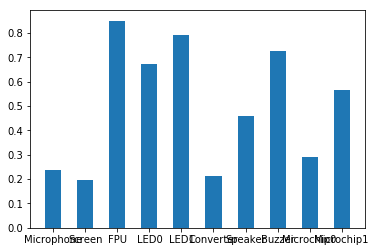

In [15]:
import matplotlib.pyplot as plt

plt.bar(components,x,width=0.5)